#### Feature Extraction with Eigen Face 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

## Eigen Face
from sklearn.decomposition import PCA 

import pickle

In [3]:
# Load the data 
with open('data.pickle', 'rb') as file: 
      
    # Call load method to deserialze 
    data = pickle.load(file) 
  

In [4]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.737255,0.713725,0.713725,0.725490,0.682353,0.709804,0.752941,0.705882,0.850980,0.854902,...,0.435294,0.450980,0.454902,0.478431,0.454902,0.470588,0.466667,0.458824,0.431373,female
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.517647,0.474510,0.462745,0.380392,0.333333,0.360784,0.356863,0.431373,0.607843,0.635294,...,0.435294,0.243137,0.243137,0.258824,0.317647,0.352941,0.392157,0.423529,0.443137,female
4,0.917647,0.917647,0.917647,0.894118,0.905882,0.803922,0.478431,0.384314,0.290196,0.211765,...,0.952941,0.929412,0.929412,0.937255,0.929412,0.925490,0.945098,0.933333,0.941176,female


#### Eigne Face 
- the most important features of a face while ignoring nonessential ones.
- Eigne Face = (all images - mean of all images) after that apply pca 

In [7]:
# Finiding the Mean Face 
X = data.drop('gender', axis=1).values # all images and also converting them into arrays 


In [8]:
X

array([[0.7372549 , 0.71372549, 0.71372549, ..., 0.46666667, 0.45882353,
        0.43137255],
       [0.1254902 , 0.09019608, 0.12156863, ..., 0.14509804, 0.24705882,
        0.07058824],
       [0.19215686, 0.19215686, 0.1372549 , ..., 0.83137255, 0.82352941,
        0.81568627],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.92156863, 0.91764706,
        0.91372549],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.67058824, 0.69019608,
        0.72941176],
       [0.71372549, 0.71764706, 0.72156863, ..., 0.74509804, 0.74509804,
        0.74509804]], shape=(7401, 10000))

In [9]:
mean_face = X.mean(axis=0) #flatten mean face 
mean_face.shape


(10000,)

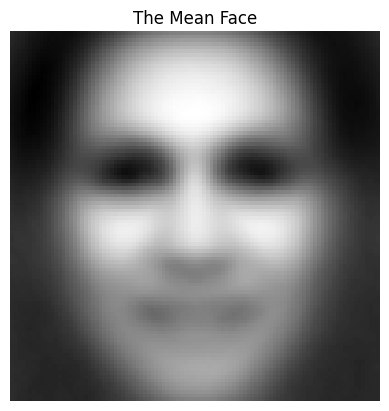

In [16]:
#lets visualize mean face 
plt.imshow(mean_face.reshape(100,100), cmap='gray')
plt.title('The Mean Face')
plt.axis('off')
plt.show()

#### Subtract the mean face  from data

In [15]:
X_t = X - mean_face  # transformed data

**Apply X_t data to PCA**
- Find the right number of componet -Elbow
- With right number of components computer Princiap Components 

In [17]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [18]:
exp_var_df = pd.DataFrame() # explained varience 
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1, len(exp_var_df)+1)

exp_var_df.head()
# if we take first principal component is giving the 24% of explained varience and 24% of cumulative_explained_varience
  

,explained_var,cum_explained_var,principal_components
0,0.246404,0.246404,1
1,0.115800,0.362204,2
2,0.102418,0.464622,3
3,0.051791,0.516413,4
4,0.033728,0.550141,5


In [19]:
exp_var_df.set_index('principal_components', inplace=True) #setting principal_components col as index

<Axes: xlabel='principal_components'>

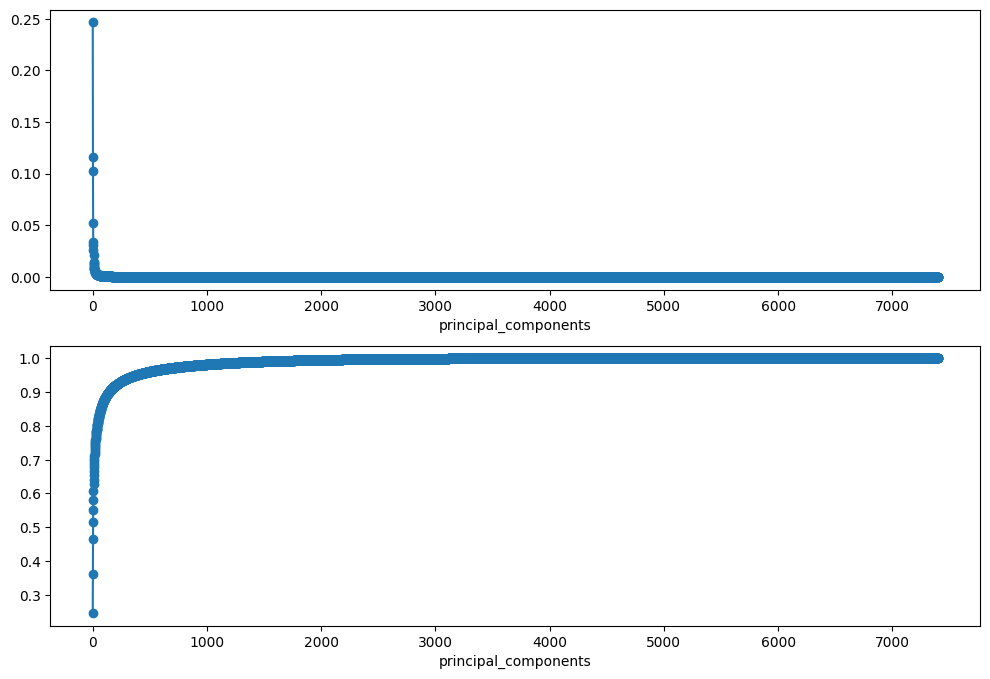

In [20]:
# Visulaizing explained variance
fig, ax = plt.subplots(nrows=2, figsize=(12,8))

exp_var_df['explained_var'].plot(kind='line', marker='o', ax=ax[0])
exp_var_df['cum_explained_var'].plot(kind='line', marker='o', ax=ax[1])


<Axes: xlabel='principal_components'>

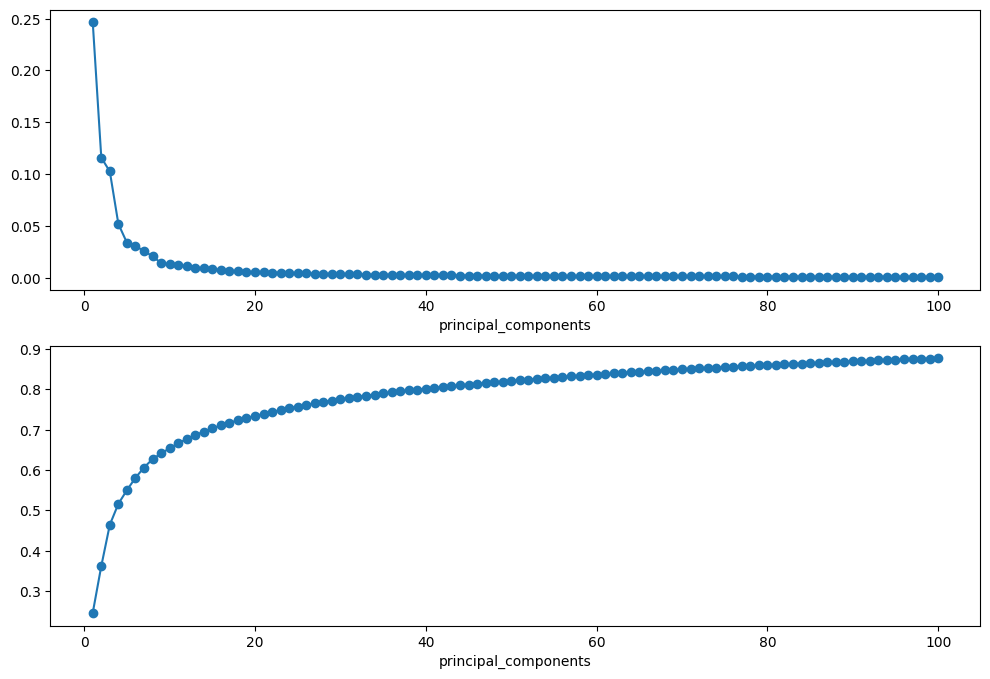

In [21]:
# Visulaizing explained variance
fig, ax = plt.subplots(nrows=2, figsize=(12,8))

exp_var_df['explained_var'].head(100).plot(kind='line', marker='o', ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line', marker='o', ax=ax[1])

**From the above plot it is clear that with approximately 45 principal components having 80% converage**

In [22]:
pca_45 = PCA(n_components=45, whiten=True, svd_solver='auto')
pca_data = pca_45.fit_transform(X_t)

In [24]:
pca_data.shape

(7401, 45)

#### Saving Data and Models


In [25]:
y = data['gender'].values #independent variables
np.savez('data_pca_45_target', pca_data, y) #saving it into numpy zip

In [26]:
# saving the model 
pca_dict = {'pca': pca_45,
            'mean_face':mean_face} #converted into dictionary

In [27]:
with open('pca_dict.pickle', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(pca_dict, file) 

### Visualize Eigen Image

In [28]:
pca_data_inv = pca_45.inverse_transform(pca_data) #inversing the pca data

In [29]:
pca_data_inv.shape

(7401, 10000)

In [30]:
eig_img = pca_data_inv[0].reshape(100,100)
eig_img.shape

(100, 100)

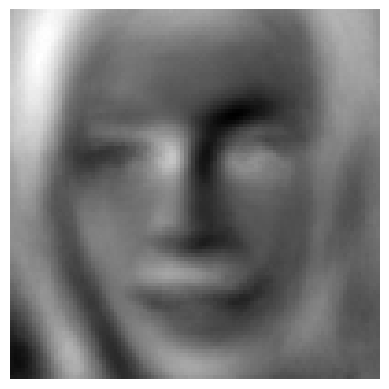

In [32]:
plt.imshow(eig_img, cmap='gray')
plt.axis('off')
plt.show()

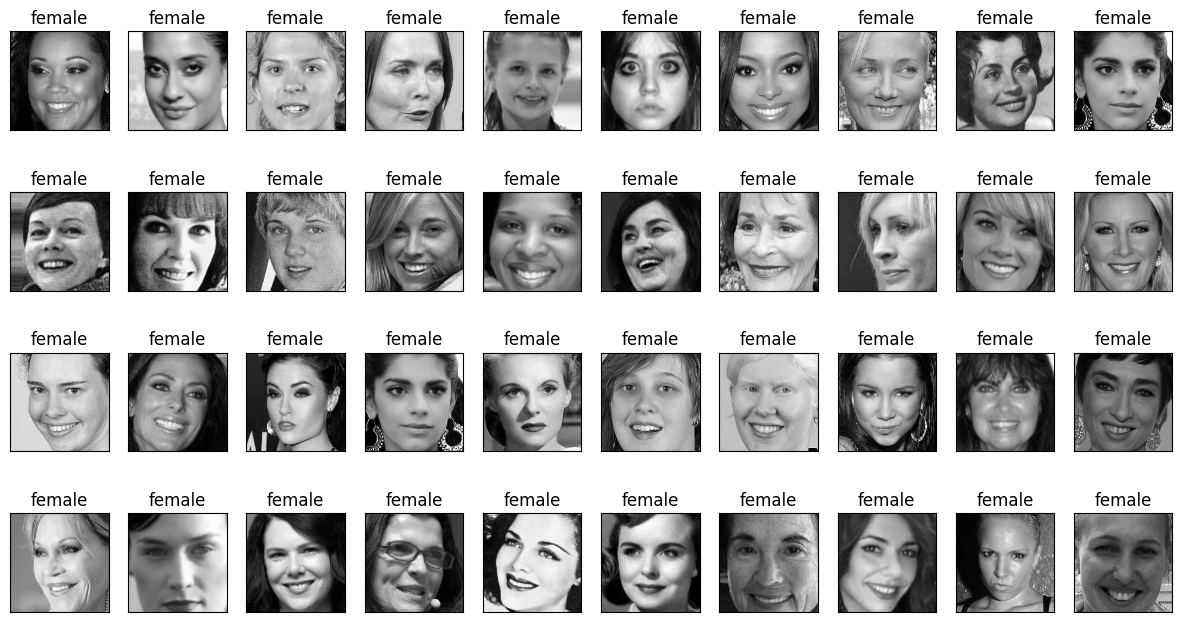

====================Eigen Images====================


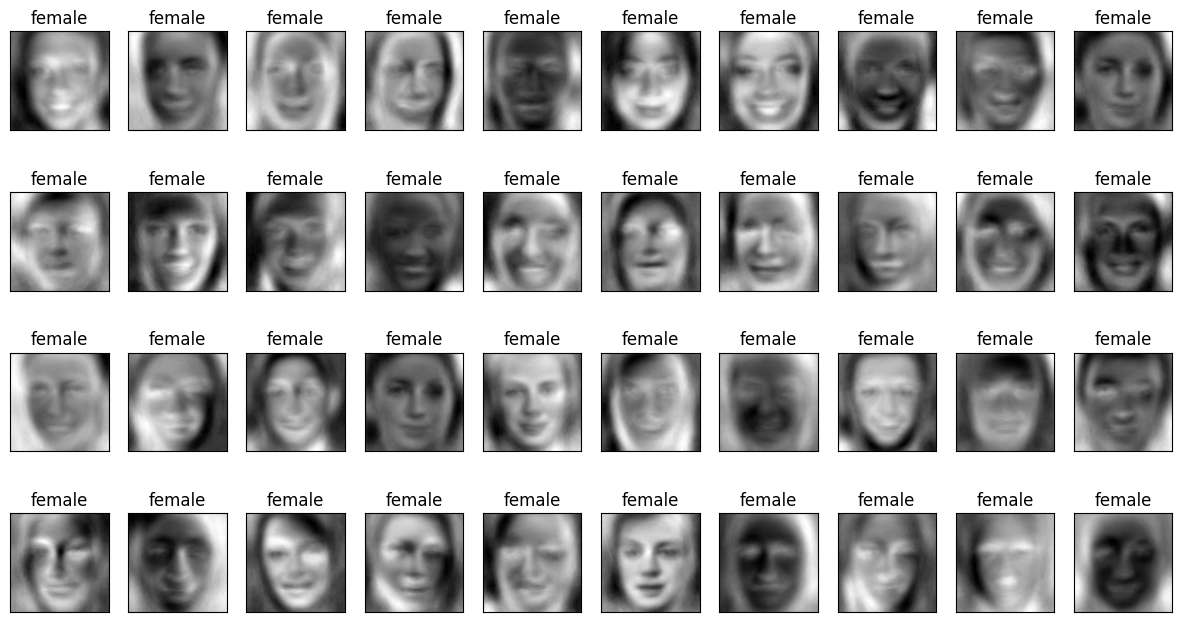

In [33]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()